<a href="https://colab.research.google.com/github/vikas-sirohi/Deep-Learning-CS7015-/blob/main/FeedForwardNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [ ]:
class SigmoidNeuron:
  def __init__(self):
    self.w = None
    self.b = None

  def preceptron(self, x):
    return np.dot(x, self.w.T) + self.b

  def sigmoid(self, z):
    return 1.0/(1.0 + np.exp(-z))

  # --- MSE Loss Function, gradient with respect to the parameters

  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.preceptron(x))
    dL_dw = (y_pred - y)*(y_pred)*(1 - y_pred)*x
    return dL_dw

  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.preceptron(x))
    dL_db = (y_pred - y)*(y_pred)*(1 - y_pred)
    return dL_db

  # --- Cross Entropy Loss Function, gradient with respect to the parameters

  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.preceptron(x))

    if y == 0:
      dL_dw = (y_pred)*x
    elif y ==1:
      dL_dw = -1*(1 - y_pred)*x

    else:
      raise ValueError("y Should be 0 or 1")   # Two class ckassification

    return dL_dw

  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.preceptron(x))

    if y == 0:
      dL_db = (y_pred)

    elif y == 1:
      dL_db = -1*(1 - y_pred)

    else:
      raise ValueError("y should be 0 or 1")

    return dL_db

  def fit(self, X, Y, lr = 0.1, epochs = 1, initialise = True, loss_fn = "mse", display_loss = True):
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    if display_loss:
      loss = {}

    for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      dw = 0
      db = 0

      for x, y in zip(X, Y):

        if loss_fn == "mse":
          dw += self.grad_w_mse(x,y)
          db += self.grad_b_mse(x, y)

        elif loss_fn == "ce":
          dw += self.grad_w_ce(x,y)
          db += self.grad_b_ce(x, y)

      m = X.shape[1]
      self.w  -=  (lr*dw)/m
      self.b -= (lr*db)/m

      if display_loss:
        Y_pred = self.sigmoid(self.preceptron(X))
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y, Y_pred)

    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')

      if loss_fn == "mse":
        plt.ylabel("Mean Squared Error")

      elif loss_fn == "ce":
        plt.ylabel("Cross Entropy loss")
      plt.show()

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.preceptron(x))
      Y_pred.append(y_pred)

    return np.array(Y_pred)


In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

In [ ]:
data, labels = make_blobs(n_samples = 1000, centers= 2, n_features =2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


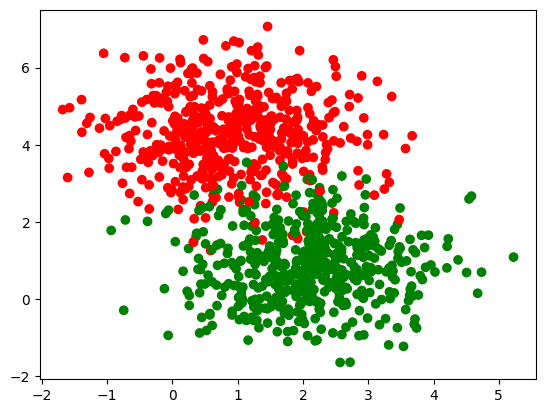

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c = labels, cmap = my_cmap)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, stratify= labels, random_state = 0)
print(X_train.shape, X_test.shape)

(750, 2) (250, 2)


<ipython-input-103-0a6da7529325>:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):


  0%|          | 0/1000 [00:00<?, ?epoch/s]

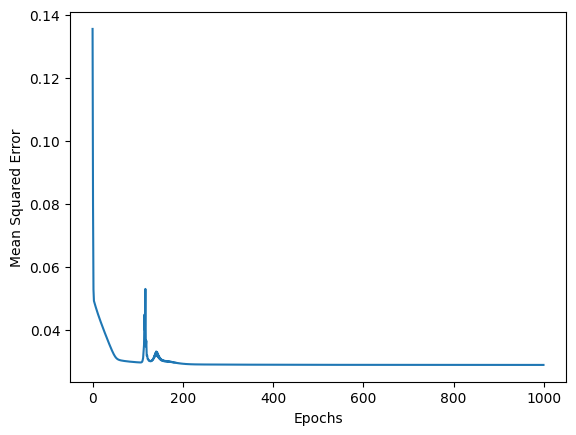

In [ ]:
# Classification by Sigmoid Neuron
sn = SigmoidNeuron()
sn.fit(X_train, y_train, lr = 0.1 ,epochs = 1000, initialise = True  ,loss_fn = "mse", display_loss = True)

In [ ]:
# ----------Cross Entropy Loss------
Y_pred_train = sn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = sn.predict(X_test)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, y_test)

print("Training Accuracy ", round(accuracy_train, 2))
print("Validation Accuracy ", round(accuracy_val, 2))

Training Accuracy  0.96
Validation Accuracy  0.95


<ipython-input-103-0a6da7529325>:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):


  0%|          | 0/1000 [00:00<?, ?epoch/s]

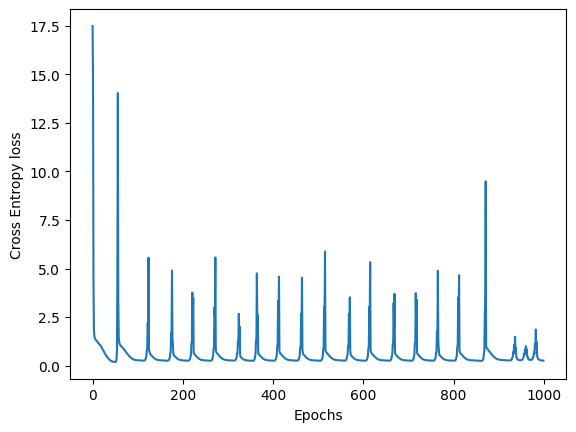

In [ ]:
# Classification by Sigmoid Neuron
sn = SigmoidNeuron()
sn.fit(X_train, y_train, lr = 0.1 ,epochs = 1000, initialise = True  ,loss_fn = "ce", display_loss = True)

In [ ]:
#----------- CrossEntropy Loss----------
Y_pred_train = sn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = sn.predict(X_test)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, y_test)

print("Training Accuracy ", round(accuracy_train, 2))
print("Validation Accuracy ", round(accuracy_val, 2))

Training Accuracy  0.96
Validation Accuracy  0.94


In [ ]:
val = np.random.randn(2, 3) # Return random matrix (m*n)
val2 = np.random.randn(3,1)
a =2
print(2*val@val2)

[[-3.21499518]
 [ 8.490972  ]]
